In [23]:
import numpy as np

generador = np.random.RandomState(50)
A = generador.random_sample((10,2))
print(A,"\n")
def distancia(a,b):
    d = 0
    for i in range(len(a)):
        d +=(a[i]-b[i])**2
    return d**.5
#distancia([1,2],[3,1])
p = np.array([0.5,0.5]) 
print(p)
distancias_puntos = []
for e in A:
    distancias_puntos.append((distancia(e,p),e))
print(distancias_puntos)
def ordenar(lista):
    n = len(lista)   # [(float,array)]
    for i in range(1,n):
        var = lista[i][0]
        fila =lista[i]
        j = i - 1
        while j>=0 and lista[j][0]>var:
            lista[j + 1] = lista[j]
            j = j - 1
        lista[j + 1] = fila
    return lista
distancias_puntos = ordenar(distancias_puntos)
print("\n",distancias_puntos)
vecinos = []
d = []
for k in range(3):
    d.append(distancias_puntos[k][0])
    vecinos.append(distancias_puntos[k][1])
vecinos = np.array(vecinos)
print("\n",vecinos)
    

[[0.49460165 0.2280831 ]
 [0.25547392 0.39632991]
 [0.3773151  0.99657423]
 [0.4081972  0.77189399]
 [0.76053669 0.31000935]
 [0.3465412  0.35176482]
 [0.14546686 0.97266468]
 [0.90917844 0.5599571 ]
 [0.31359075 0.88820004]
 [0.67457307 0.39108745]] 

[0.5 0.5]
[(np.float64(0.27197047692131543), array([0.49460165, 0.2280831 ])), (np.float64(0.26559459629439314), array([0.25547392, 0.39632991])), (np.float64(0.5115051820932228), array([0.3773151 , 0.99657423])), (np.float64(0.28697403794866416), array([0.4081972 , 0.77189399])), (np.float64(0.32245280799771375), array([0.76053669, 0.31000935])), (np.float64(0.21336183170589662), array([0.3465412 , 0.35176482])), (np.float64(0.590851634525762), array([0.14546686, 0.97266468])), (np.float64(0.41354787921680813), array([0.90917844, 0.5599571 ])), (np.float64(0.4306363650752269), array([0.31359075, 0.88820004])), (np.float64(0.20576126791130434), array([0.67457307, 0.39108745]))]

 [(np.float64(0.20576126791130434), array([0.67457307, 0.39

Precisión del modelo (Accuracy): 0.76
train: 105  test: 45
total: 150  total iris: 150
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.67      0.71      0.69        17
   virginica       0.69      0.65      0.67        17

    accuracy                           0.76        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.76      0.76      0.76        45



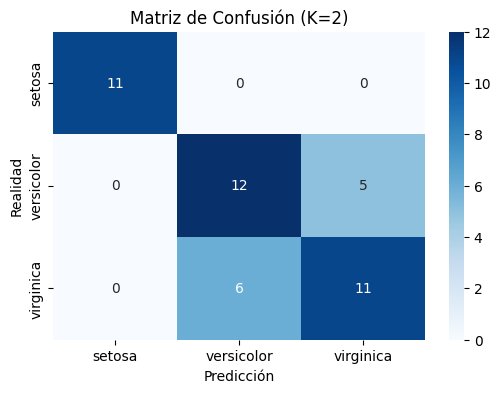

In [37]:
import numpy as np
import random as rd
import math
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#=====================================
class Escalador:
    def __init__(self,u=None,sigma=None):
        self.u = u
        self.sigma = sigma
    #--------------------------
    def escalar_train(self,X):
        X = np.array(X)
        X_es = X.copy()
        u = X_es.mean(axis=0)
        sigma = X_es.std(axis=0)
        X_es =( X_es - u )/sigma
        self.u = u
        self.sigma = sigma
        return X_es
    #---------------------------------
    def escalar_test(self,X):
        X_test = X.copy()
        X_test = (X_test -self.u)/self.sigma
        return X_test
#=====================================
class Splitter: 
    #---------------------------------------
    def permutacion(self,n,n_sub):                 # PC1: l 8 columnas , n_sub 5 predictores para EFS mlxtend 
        f = []
        k = n
        l = list(range(n))
        while k>1:
            i = math.floor(k*rd.uniform(0,1)) 
            l[k-1] , l[i] = l[i] , l[k-1]
            f.append(l[k-1])
            if (len(l) - k) + 1  == n_sub:
                break
            k = k - 1 
        return f
    #----------------------------------------
    def dividir_datos(self,X,y,por):
        n = len(X)
        n_sub = n - int(n*por/100)
        indices = list(range(n))
        inds =  self.permutacion(n,n_sub)
        resto = list(set(indices) - set(inds))
        X_train,X_test,y_train,y_test = X[inds],X[resto],y[inds],y[resto]
        return  X_train,X_test,y_train,y_test
    #---------------------------------------- 
    
#================================
class KNN:
    def __init__(self,metrica):  #1,2
        self.metrica =  metrica
        self.X_train = None
        self.y_train = None
    #------------------------------
    def distancia(self,a,b):
        if self.metrica == 2:
            d = 0
            for i in range(len(a)):
                d +=(a[i]-b[i])**2
            return d**.5
        if self.metrica == 1:
            d = 0
            for i in range(len(a)):
                d+=abs(a[i] - b[i])
            return d
    #-----------------------------
    def ordenar(self,lista):
        n = len(lista)   # [(float,int)]
        for i in range(1,n):
            var = lista[i][0]
            fila =lista[i]
            j = i - 1
            while j>=0 and lista[j][0]>var:
                lista[j + 1] = lista[j]
                j = j - 1
            lista[j + 1] = fila
        return lista
    #---------------------------
    def entrenar(self,X,y):
        self.X_train = X
        self.y_train = y 
    #------------------------------
    def votar(self,distancias,k): 
        d_s = []
        vecinos = []
        for i in range(k):
            d_s.append(distancias[i][0])
            vecinos.append(distancias[i][1]) 
        return d_s, vecinos 
    #------------------------------
    def conteo(self,clases):
        conteo = {}
        for c in clases:
            if c not in conteo:
                conteo[c] = 0
            conteo[c] +=1
        clase = max(conteo,key = conteo.get)
        return clase
    #--------------------------------
    def predecir(self,X_test,k):
        predicciones = []
        for i in range(len(X_test)):
            distancias = []
            for j in range(len(self.X_train)): 
                d = self.distancia(X_test[i],self.X_train[j])
                distancias.append((d,j))
            distancias = self.ordenar(distancias)
            _,vecinos = self.votar(distancias,k)
            clases = self.y_train[vecinos]
            clase = self.conteo(clases)
            predicciones.append(clase) # (array,float)
        return predicciones
    #----------------------------------
        
    #======================================
if __name__=='__main__':
    iris = datasets.load_iris()
    X = iris.data[:,:2]
    y = iris.target
    separador = Splitter()
    escalador = Escalador()
    X_train,X_test,y_train,y_test = separador.dividir_datos(X,y,30)
    X_train = escalador.escalar_train(X_train)
    X_test = escalador.escalar_test(X_test)
    knn = KNN(2)
    knn.entrenar(X_train,y_train)
    y_pred = knn.predecir(X_test,3)
    print(f"Precisión del modelo (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
    print(f"train: {len(X_train)}  test: {len(X_test)}")
    print(f"total: {len(X_train)+len(X_test)}  total iris: {len(X)}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title(f'Matriz de Confusión (K={k})')
plt.show()